In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import tabula
import seaborn as sns

## Reading Files CSV and PDF

In [2]:
a= pd.read_csv('zappyloan.csv')

In [3]:
b= tabula.read_pdf('zappy.pdf',pages='all')

In [4]:
a.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [5]:
b= tabula.read_pdf('zappy.pdf',pages='all', pandas_options={'header': None})
b[0].head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1002,1,0,0,1,0,5849,0,128,360,1,1,Y
2,1003,1,1,1,1,0,4583,1508,128,360,1,3,N
3,1005,1,1,0,1,1,3000,0,66,360,1,1,Y
4,1006,1,1,0,0,0,2583,2358,120,360,1,1,Y


## Convert and merge both files

In [6]:
## Converting PDF into CSV file
c=tabula.convert_into('zappy.pdf','zappy_loan.csv',output_format="csv",pages='all')

In [7]:
## Checking file is executing properly after intialising
loan_df=pd.read_csv('zappy_loan.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1,0,0,1,0,5849,0.0,128,360,1,1,Y
1,1003,1,1,1,1,0,4583,1508.0,128,360,1,3,N
2,1005,1,1,0,1,1,3000,0.0,66,360,1,1,Y
3,1006,1,1,0,0,0,2583,2358.0,120,360,1,1,Y
4,1008,1,0,0,1,0,6000,0.0,141,360,1,1,Y


In [8]:
# Checking before merging that all the columns are same
a.columns==loan_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [9]:
# Merging the data
lis=[a,loan_df]
loan=pd.concat(lis)
loan

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,2265,1,1,2,0,0,1993,1625.0,113,180,1,2,Y
394,2266,1,1,2,1,0,3100,1400.0,113,360,1,1,Y
395,2272,1,1,2,1,0,3276,484.0,135,360,0,2,Y
396,2277,2,0,0,1,0,3180,0.0,71,360,0,1,N


## Working on combined Data

In [10]:
# Checking the shape of new data and columns name
loan.shape
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
# Detailed information
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 397
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            645 non-null    int64  
 1   Gender             645 non-null    int64  
 2   Married            645 non-null    int64  
 3   Dependents         645 non-null    int64  
 4   Graduate           645 non-null    int64  
 5   Self_Employed      645 non-null    int64  
 6   ApplicantIncome    645 non-null    int64  
 7   CoapplicantIncome  645 non-null    float64
 8   LoanAmount         645 non-null    int64  
 9   Loan_Amount_Term   645 non-null    int64  
 10  Credit_History     645 non-null    int64  
 11  Property_Area      645 non-null    int64  
 12  Loan_Status        645 non-null    object 
dtypes: float64(1), int64(11), object(1)
memory usage: 70.5+ KB


In [12]:
# Describing the data 
loan.describe()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1996.812403,1.186047,0.648062,0.731783,0.784496,0.130233,5365.589147,1608.560806,148.150388,334.837209,0.776744,1.959690
std,553.465890,0.389446,0.477945,1.002015,0.411491,0.336820,6021.940563,2867.004510,86.122299,63.206969,0.416752,0.789048
min,1002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,1562.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.000000,333.000000,1.000000,1.000000
50%,1955.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3813.000000,1229.000000,128.000000,360.000000,1.000000,2.000000
75%,2448.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5726.000000,2306.000000,168.000000,360.000000,1.000000,3.000000
max,2990.000000,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


In [13]:
# Checking if there is any null value
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
# Checking the duplicate values
loan.duplicated().value_counts()

False    642
True       3
dtype: int64

In [15]:
# As we can see there are some duplicates we will drop the duplicate values
loan=loan.drop_duplicates()

In [16]:
# Checking the new shape of the data
loan.shape

(642, 13)

## Checking the female appliacnts that got loan approved


In [17]:
female_loan_sanctioned=np.where((loan['Gender']==2)&(loan['Loan_Status']=='Y'))

In [18]:
female_loan_sanctioned

(array([  5,   7,   9,  15,  19,  24,  33,  38,  48,  63,  68,  72,  96,
        101, 106, 113, 126, 128, 133, 134, 142, 149, 167, 173, 175, 177,
        189, 192, 194, 215, 220, 237, 242, 276, 284, 292, 296, 297, 298,
        327, 343, 358, 360, 363, 366, 368, 369, 372, 392, 393, 431, 444,
        445, 452, 453, 466, 480, 484, 485, 502, 510, 516, 517, 526, 530,
        534, 542, 546, 550, 554, 556, 562, 567, 573, 583, 598, 599, 614,
        618, 626], dtype=int64),)

In [19]:
# Checking the first one full details my calling iloc
loan.iloc[[5]]

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
5,2300,2,0,0,0,0,1963,0.0,53,333,1,2,Y


In [20]:
# Checking total numer of loans approved for female
len(female_loan_sanctioned[0])

80

In [21]:
# In terms of percentage loan got approved
percentage_female_approval=(len(female_loan_sanctioned[0])/len(loan))*100

In [22]:
percentage_female_approval

12.461059190031152

## The average income of all applicants

In [23]:
total_sum=loan['ApplicantIncome'].astype(float).sum()
avg_income= total_sum/len(loan)

In [24]:
avg_income

5370.386292834891

## The average income of all self-employed applicants 

In [25]:
self_employed =np.where((loan['Self_Employed']==1))

In [26]:
self_employed[0]

array([  6,  16,  22,  43,  50,  63,  71,  72,  78,  82,  87,  93, 103,
       106, 108, 111, 121, 126, 131, 141, 155, 156, 158, 167, 183, 190,
       194, 196, 222, 224, 225, 227, 229, 231, 246, 249, 252, 272, 279,
       291, 301, 309, 315, 318, 321, 324, 326, 328, 360, 375, 377, 380,
       384, 389, 398, 421, 432, 433, 435, 446, 459, 460, 473, 476, 484,
       490, 492, 499, 501, 511, 527, 557, 563, 569, 571, 578, 579, 581,
       597, 608, 614, 616, 627], dtype=int64)

In [27]:
# Temperary allocation in different variable
temp=loan['ApplicantIncome'].iloc[[616]]

In [28]:
# Checking the value of 616 row
loan.iloc[[616]]

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
372,2201,1,1,2,1,1,9323,7873.0,380,300,1,3,Y


In [29]:
# Intializing sum to 0 and then counting total number of applicant
sum=0
for i in self_employed[0]:
    sum=sum+int(loan['ApplicantIncome'].iloc[[i]])

In [30]:
# Formula for average self-employed income
avg_income_self_employed = sum/len(loan)

In [31]:
avg_income_self_employed

949.0342679127726

## Average Income of all non self-employed

In [32]:
non_self_employed =np.where((loan['Self_Employed']==0))

In [33]:
sum1=0
for i in non_self_employed[0]:
    sum1= sum1+int(loan['ApplicantIncome'].iloc[[i]])

In [34]:
avg_income_non_self_employed=sum1/len(loan)
avg_income_non_self_employed

4421.352024922118

## Average Income of all Graduate

In [35]:
graduate=np.where((loan['Graduate']==1))

In [36]:
sum2=0
for i in graduate[0]:
    sum2=sum2+int(loan['ApplicantIncome'].iloc[[i]])

In [37]:
avg_grad_income=sum2/len(loan)
avg_grad_income

4558.884735202492

## Percentage of Graduate applicant loan approved

In [38]:
grad_sanctioned =np.where((loan['Graduate']==1)&(loan['Loan_Status']=='Y'))

In [39]:
len(grad_sanctioned[0])

360

In [40]:
percentage_grad_approved = (len(grad_sanctioned[0]))/len(loan)*100

In [41]:
percentage_grad_approved

56.074766355140184

## Visualization of Data

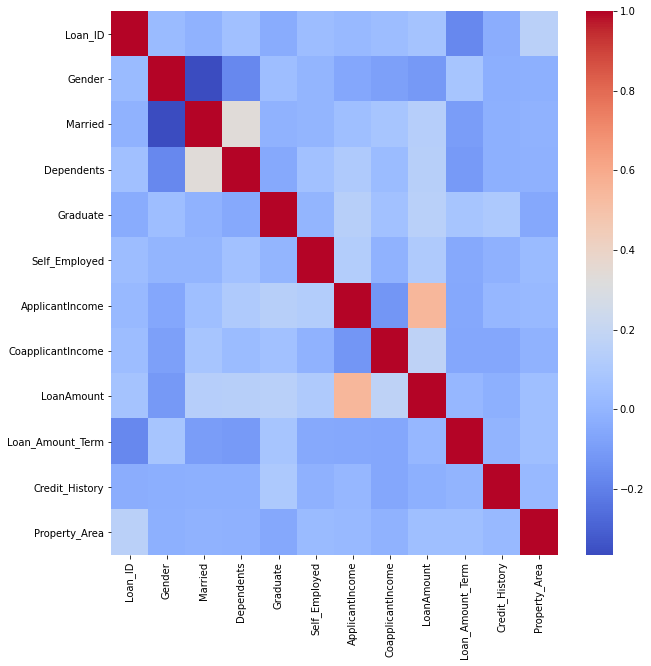

In [42]:
# Using Heatmap for correlation between numerical columns
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),cmap='coolwarm')
plt.show()

C:\Users\cvm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

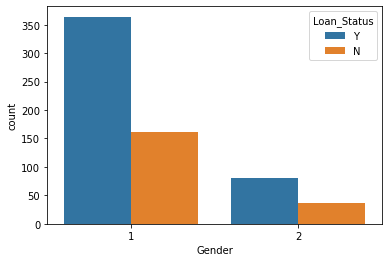

In [43]:
# Based on Gender Loan Status
sns.countplot('Gender',hue='Loan_Status',data=loan)

C:\Users\cvm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

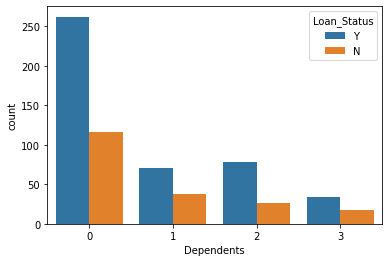

In [44]:
# Based on Dependents for Loan
sns.countplot('Dependents',hue='Loan_Status',data=loan)

C:\Users\cvm\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

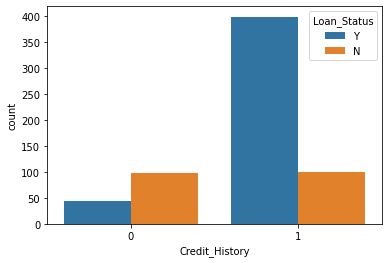

In [45]:
# Based on Credit History
sns.countplot('Credit_History',hue='Loan_Status',data=loan)

C:\Users\cvm\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


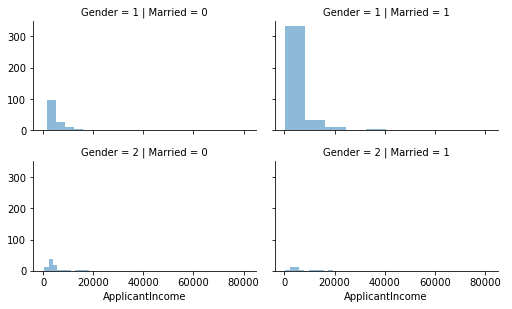

In [46]:
grid1=sns.FacetGrid(loan,row='Gender',col='Married',size=2.2,aspect=1.6)
grid1.map(plt.hist,'ApplicantIncome',alpha=.5,bins=10)
grid1.add_legend()

## Using Models and train test method for module

In [47]:
from sklearn.model_selection import cross_val_score
def classify(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    model.fit(X_train,y_train)
    print("Accuracy is",model.score(X_test,y_test)*100)
    score = cross_val_score(model,X,y,cv=5)
    print("Cross validation is",np.mean(score)*100)

In [48]:
X=loan.drop(columns=['Loan_Status','Loan_ID','CoapplicantIncome'],axis=1)
y=loan['Loan_Status']

In [49]:
# Import train - test method

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
classify(model,X,y)
model.fit(X_train,y_train)

Accuracy is 79.84496124031007
Cross validation is 77.09544573643412


LogisticRegression(random_state=0)

<AxesSubplot:>

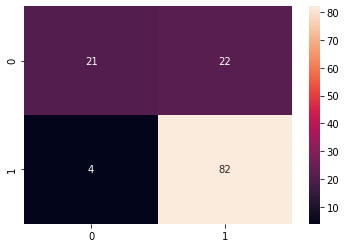

In [50]:

## Using Confusion Matrix


y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
sns.heatmap(cm,annot=True)

In [51]:
## Using Random Forest Approach
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model,X,y)
model.fit(X_train,y_train)

Accuracy is 77.51937984496125
Cross validation is 73.51017441860466


RandomForestClassifier()